**Skin Cancer Classification**

In [ ]:
#importing the necessary dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
!pip install opendatasets
import opendatasets as od

**Download the Dataset from Kaggle**

In [ ]:
od.download("https://www.kaggle.com/datasets/iashiqul/skin-cancer-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harsha16112003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/iashiqul/skin-cancer-classification


100%|██████████| 262M/262M [00:02<00:00, 112MB/s]


In [ ]:
import pickle

In [ ]:
import cv2
import os
import random

In [ ]:
DIRECTORY = "/content/skin-cancer-classification/Final Skin cancer dataset/Training"
Categories = ["Basal Cell Carcinoma","Melanoma","Seborrheic Keratosis","Vascular Tumors"]

Basal Cell Carcinoma: 0
Melanoma: 1
Seborrheic Keratosis: 2
Vascular Tumors: 3


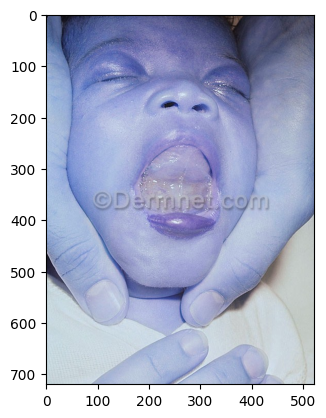

In [ ]:
Image_size = 255
data = []

for category in Categories:
  folders = os.path.join(DIRECTORY,category)
  label = Categories.index(category)
  print(f"{category}:",label)
  for img in os.listdir(folders):
    image_path = os.path.join(folders,img)
    image_arr = cv2.imread(image_path)
    image_arr_resize = cv2.resize(image_arr,(Image_size,Image_size))
    plt.imshow(image_arr)
    #break
    data.append([image_arr_resize,label])

In [ ]:
len(data)

1631

In [ ]:
random.shuffle(data)

In [ ]:
data[0]

[array([[[203, 218, 230],
         [199, 215, 227],
         [201, 217, 230],
         ...,
         [ 69, 103, 139],
         [ 74, 107, 146],
         [ 69, 102, 141]],
 
        [[208, 219, 232],
         [203, 215, 229],
         [203, 216, 231],
         ...,
         [ 87, 118, 155],
         [ 73, 104, 141],
         [ 73, 104, 143]],
 
        [[217, 224, 241],
         [206, 216, 233],
         [201, 214, 231],
         ...,
         [107, 136, 173],
         [ 73, 103, 139],
         [ 73, 104, 143]],
 
        ...,
 
        [[140, 151, 183],
         [135, 148, 180],
         [139, 149, 183],
         ...,
         [ 83,  96, 110],
         [ 76,  92, 109],
         [ 68,  90, 109]],
 
        [[140, 151, 179],
         [145, 157, 190],
         [146, 157, 190],
         ...,
         [ 78,  99, 115],
         [ 88,  93, 112],
         [ 73,  89, 107]],
 
        [[147, 158, 186],
         [147, 159, 192],
         [147, 157, 190],
         ...,
         [ 76,  98, 114],
  

Extracting the Features and target values into x and y lists

In [ ]:
x = []
y = []

for feature,label in data:
  x.append(feature)
  y.append(label)

In [ ]:
print(x)

[array([[[203, 218, 230],
        [199, 215, 227],
        [201, 217, 230],
        ...,
        [ 69, 103, 139],
        [ 74, 107, 146],
        [ 69, 102, 141]],

       [[208, 219, 232],
        [203, 215, 229],
        [203, 216, 231],
        ...,
        [ 87, 118, 155],
        [ 73, 104, 141],
        [ 73, 104, 143]],

       [[217, 224, 241],
        [206, 216, 233],
        [201, 214, 231],
        ...,
        [107, 136, 173],
        [ 73, 103, 139],
        [ 73, 104, 143]],

       ...,

       [[140, 151, 183],
        [135, 148, 180],
        [139, 149, 183],
        ...,
        [ 83,  96, 110],
        [ 76,  92, 109],
        [ 68,  90, 109]],

       [[140, 151, 179],
        [145, 157, 190],
        [146, 157, 190],
        ...,
        [ 78,  99, 115],
        [ 88,  93, 112],
        [ 73,  89, 107]],

       [[147, 158, 186],
        [147, 159, 192],
        [147, 157, 190],
        ...,
        [ 76,  98, 114],
        [ 90,  95, 113],
        [ 77,  94, 110]

In [ ]:
print(y)

[2, 2, 1, 3, 2, 1, 3, 0, 2, 2, 2, 3, 1, 2, 2, 0, 3, 1, 3, 1, 3, 0, 0, 0, 0, 3, 0, 1, 2, 1, 0, 3, 0, 3, 2, 0, 1, 1, 3, 3, 2, 0, 3, 0, 3, 1, 3, 2, 3, 2, 0, 1, 0, 2, 3, 1, 0, 2, 1, 3, 2, 1, 0, 3, 3, 2, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 3, 1, 0, 3, 0, 3, 3, 0, 0, 1, 2, 1, 1, 3, 0, 0, 1, 3, 1, 0, 2, 1, 3, 0, 0, 1, 1, 0, 0, 2, 3, 0, 2, 3, 1, 3, 2, 3, 1, 0, 2, 3, 3, 1, 3, 3, 3, 2, 0, 0, 2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 1, 3, 1, 1, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 1, 1, 0, 2, 2, 0, 3, 2, 3, 0, 2, 1, 2, 1, 3, 3, 3, 3, 3, 1, 3, 3, 0, 1, 3, 3, 0, 1, 2, 2, 3, 2, 2, 0, 2, 3, 1, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 3, 2, 1, 1, 2, 1, 1, 0, 0, 2, 3, 0, 3, 3, 2, 3, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 3, 2, 1, 0, 0, 1, 1, 0, 1, 3, 1, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 1, 3, 0, 2, 3, 1, 3, 0, 3, 3, 2, 0, 1, 0, 3, 1, 0, 2, 3, 0, 3, 2, 2, 3, 1, 1, 3, 3, 1, 3, 1, 1, 3, 2, 3, 3, 2, 2, 1, 3, 0, 0, 1, 0, 2, 2, 0, 3, 3, 1, 1, 2, 1, 0, 0, 0, 3, 3, 0, 3, 3, 2, 3, 2, 1, 2, 2, 0, 3, 0, 3, 0, 3, 0, 0, 1, 0, 0, 3, 0, 1, 3, 

In [ ]:
x.shape

(1631, 255, 255, 3)

In [ ]:
y.shape

(1631,)

In [ ]:
# converting into arrays

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
len(x)

1631

In [ ]:
len(y)

1631

Importing the necessary libraries for building the models

In [ ]:
import tensorflow

In [ ]:
from keras.layers import Conv2D

In [ ]:
from keras.layers import MaxPooling2D
from keras.models import Sequential

In [ ]:
from keras.layers import Flatten

In [ ]:
from keras.layers import Dropout

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.layers import BatchNormalization

# Building the Convolutional Neural Network Model

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(255,255,3)))
cnn.add(MaxPooling2D(1,1))
cnn.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(1,1))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=32,kernel_size=(2,2),padding="same",activation="relu"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
cnn.add(MaxPooling2D(2,2))
cnn.add(Conv2D(filters=128,kernel_size=(1,1),padding="same",activation="relu"))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(2,2))
cnn.add(Dropout(0.2))

cnn.add(Flatten())
cnn.add(Dense(512,activation="relu"))
cnn.add(Dense(300,activation="relu"))
cnn.add(Dense(200,activation="relu"))
cnn.add(Dense(4,activation="softmax"))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)                   │ (None, 255, 255, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 255, 255, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 255, 255, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 255, 255, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 255, 255, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 255, 255, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 127, 127, 32)        │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 127, 127, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 63, 63, 128)         │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 31, 31, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 31, 31, 128)         │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 31, 31, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │      14,746,1

 Total params: 15,011,032 (57.26 MB)

 Trainable params: 15,010,648 (57.26 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
#compilation of model

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [ ]:
#Fitting the model

In [ ]:
history = cnn.fit(x,y,epochs=30,validation_split=0.1)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 337ms/step - accuracy: 0.3430 - loss: 3.5427 - val_accuracy: 0.2378 - val_loss: 2.0507
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.5211 - loss: 1.2300 - val_accuracy: 0.3232 - val_loss: 1.4154
Epoch 3/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 203ms/step - accuracy: 0.5882 - loss: 1.0489 - val_accuracy: 0.3293 - val_loss: 1.4976
Epoch 4/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.6340 - loss: 0.8993 - val_accuracy: 0.4939 - val_loss: 1.3283
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 202ms/step - accuracy: 0.7082 - loss: 0.7856 - val_accuracy: 0.3659 - val_loss: 2.3611
Epoch 6/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.7326 - loss: 0.7187 - val_accuracy: 0.4329 - val_loss: 1.4221
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.7819 - loss: 0.5734 - val_accuracy: 0.4268 - val_loss: 1.6742
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 0.7948 - loss: 0.5218 - val_accura

In [ ]:
import seaborn as sns

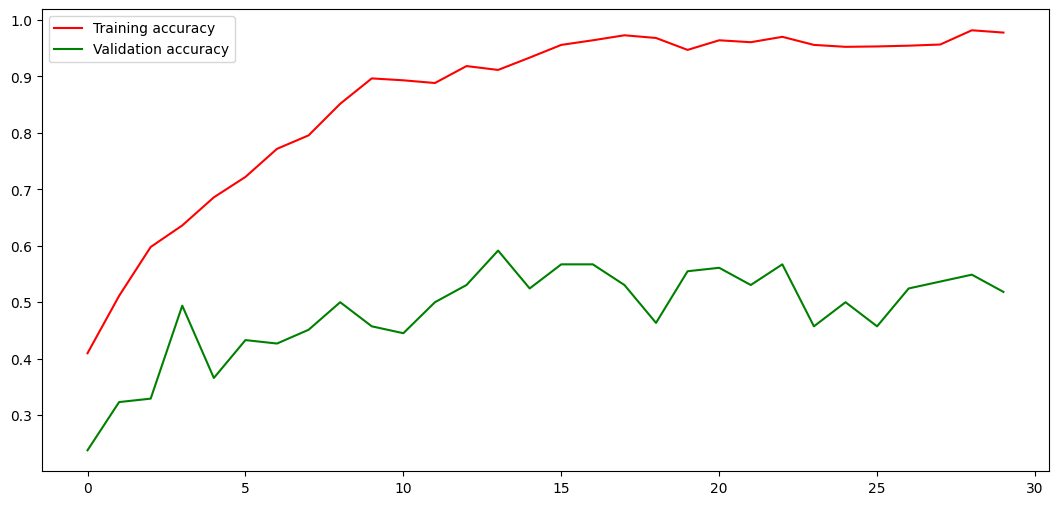

In [ ]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
epochs = range(len(acc))
fig = plt.figure(figsize=(13,6))
plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'g',label="Validation accuracy")
plt.legend(loc="upper left")
plt.show()

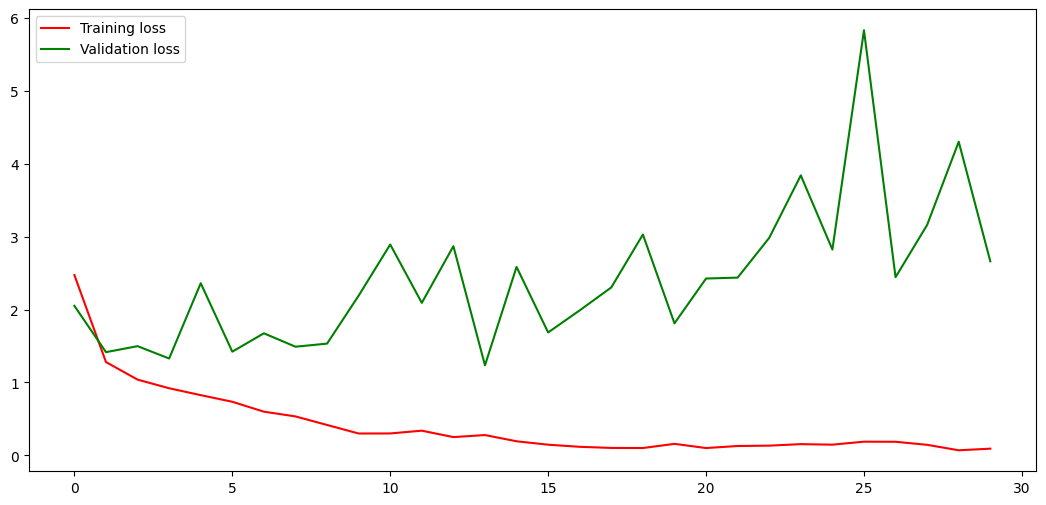

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
fig = plt.figure(figsize=(13,6))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'g',label="Validation loss")
plt.legend(loc="upper left")
plt.show()

**Building the Predictive Model**

In [ ]:
#import image preprocessing from tensorflow

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
"""
def predictive_Model():
  input_link = input("Paste the image link for Prediction:")
  input_image = cv2.imread(input_link)
  input_image_resize = cv2.resize(input_image,(255,255))
  img_array = np.array(input_image_resize)
  img_array = img_array.reshape(1,255,255,3)
  plt.imshow(input_image)
  a=cnn.predict(img_array)
  indeces = a.argmax()
  if indeces == 0:
    print("The skin Cancer type is:Basal Cell Carcinoma Cancer")
  elif indeces == 1:
    print("The Skin Cancer type is: Melanoma Cancer")
  elif indeces == 2:
    print("The Skin Cancer type is: Seborrheic Keratosis Cancer")
  else:
    print("The skin Cancer type is: Vascular Tumors Cancer")
"""


'\ndef predictive_Model():\n  input_link = input("Paste the image link for Prediction:")\n  input_image = cv2.imread(input_link)\n  input_image_resize = cv2.resize(input_image,(255,255))\n  img_array = np.array(input_image_resize)\n  img_array = img_array.reshape(1,255,255,3)\n  plt.imshow(input_image)\n  a=cnn.predict(img_array)\n  indeces = a.argmax()\n  if indeces == 0:\n    print("The skin Cancer type is:Basal Cell Carcinoma Cancer")\n  elif indeces == 1:\n    print("The Skin Cancer type is: Melanoma Cancer")\n  elif indeces == 2:\n    print("The Skin Cancer type is: Seborrheic Keratosis Cancer")\n  else:\n    print("The skin Cancer type is: Vascular Tumors Cancer")\n'

Paste the image link for Prediction:/content/skin-cancer-classification/Final Skin cancer dataset/Testing/Seborrheic Keratosis/seborrheic-keratoses-ruff-126.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The skin Cancer type is: Vascular Tumors Cancer


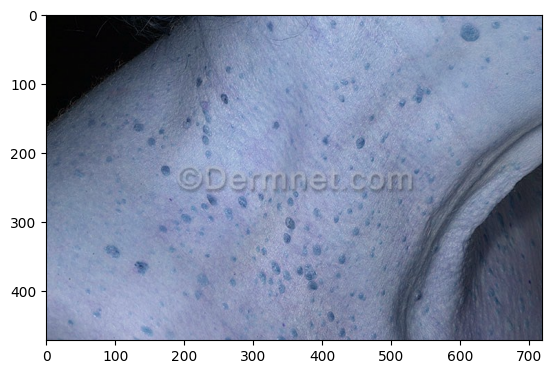

In [ ]:
#predictive_Model()

In [ ]:
img=cv2.imread("/content/skin-cancer-classification/Final Skin cancer dataset/Testing/Vascular Tumors/cherry-angioma-16.jpg")
img=cv2.resize(img,(255,255))
img_array = np.array(img)
img_array = img_array.reshape(1,255,255,3)

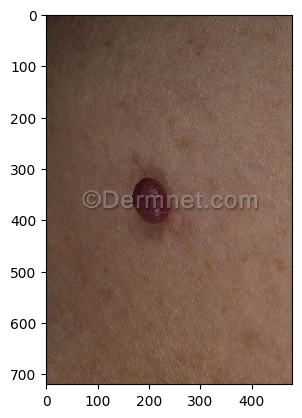

In [ ]:
img = image.load_img("/content/skin-cancer-classification/Final Skin cancer dataset/Testing/Vascular Tumors/cherry-angioma-16.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=cnn.predict(img_array)
indeces = a.argmax()
if indeces == 0:
  print("The skin Cancer type is:Basal Cell Carcinoma Cancer")
elif indeces == 1:
  print("The Skin Cancer type is: Melanoma Cancer")
elif indeces == 2:
  print("The Skin Cancer type is: Seborrheic Keratosis Cancer")
else:
  print("The skin Cancer type is: Vascular Tumors Cancer")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The skin Cancer type is: Vascular Tumors Cancer


**END OF THE PROJECT**